# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

The sample size appears rather small for a hospital unless we have restricted the date range or the hospital is really small. Without knowing the number of charge rows in the table it is diffcult to tell if this is really a representative sample.  

The standard deviation measures the spread of the data around the mean. In this case the standard deviation is quite large, almost as large as the mean. This standard deviation indicates there is great variability in charges. See the calculation in a step below but the values are:
Mean of Charges: 13270.42
Standard Deviation of Charges: 12110.01

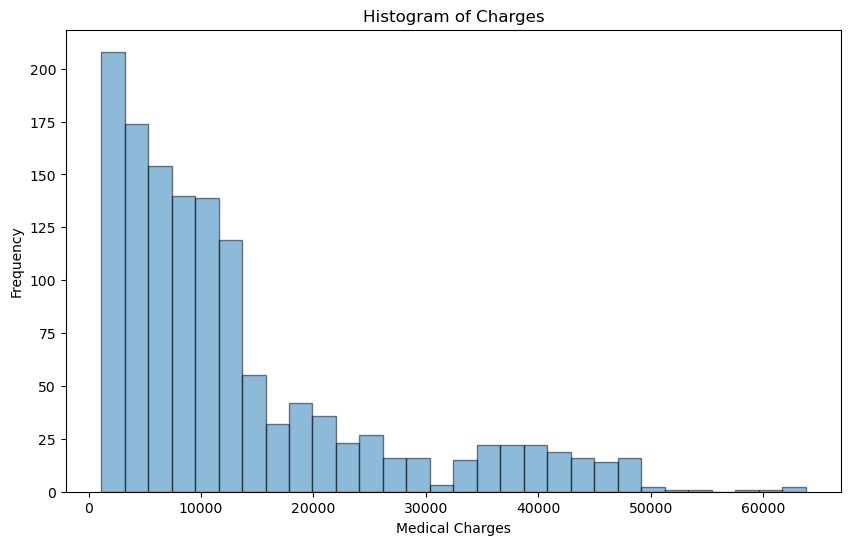

In [4]:
# Plot the histogram of charges
plt.figure(figsize=(10, 6))
plt.hist(medical['charges'], bins=30, edgecolor='k', alpha=0.5)
plt.xlabel('Medical Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')
plt.show()

In [5]:
# Calculate the mean and standard deviation
mean_charges = medical['charges'].mean()
std_dev_charges = medical['charges'].std()

print(f"Mean of Charges:", round(mean_charges, 2))
print(f"Standard Deviation of Charges:", round(std_dev_charges,2))

Mean of Charges: 13270.42
Standard Deviation of Charges: 12110.01


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In order to answer the administrator's concern about whether the actual average charge has fallen below $12,000, we can perform a hypothesis test to determine if the mean charge is less than $12,000, namely a t-test.

Since we want to test whether the mean charge has fallen below $12,000, this is a one-tailed test. 

Null Hypothesis (H0): The actual average charge is not less than $12,000.
H0: Avg Charge >= $12,000

Alternative Hypothesis (H1): The actual average charge is less than $12,000.
H1: Avg Charge < $12,000

To determine whether there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis, we can use a t-test for a population mean. 

This is a one-tailed test. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

The confidence interval of 95% is most appopriate and is also given in the problem.
The most appropriate frequentist test to apply in this case is a one sided t-test for a population mean, with the null hypothesis (H0) testing that the mean charge is greater than or equal to $12,000, and the alternative hypothesis (H1) testing that the mean charge is less than $12,000.

In [6]:
# The test value - estimated population mean
est_pop_mean = 12000

# Calculate the mean and standard deviation
mean_charges = np.mean(medical['charges'])
std_dev_charges = np.std(medical['charges'], ddof=1)
sample_size = len(medical['charges'])

In [7]:
print(sample_size)

1338


In [8]:
# Calculate the t-statistic
t_statistic = (mean_charges - est_pop_mean) / (std_dev_charges / np.sqrt(sample_size))

# Degrees of freedom
degrees_of_freedom = sample_size - 1

# Significance level we are using
alpha = 0.05

In [46]:
# Calculate the p-value
p_value = t.cdf(t_statistic, df=degrees_of_freedom)

# Test if the null hypothesis is rejected
if p_value < alpha:
    print("We should reject the null hypothesis, p value = ", p_value)
else:
    print("We should NOT reject the null hypothesis, p value = ", p_value)

We should NOT reject the null hypothesis, p value =  1.0


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

The assumption about the variances of the two groups is that the variances of the charges for those with insurance and those without insurance are equal. 

The null hypothesis (H0) is given as the means of the charges for people with insurance and people without insurance are equal.

The alternative hypothesis (H1) is given as the means of the charges for people with insurance and people without insurance are not equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

I assume when you say perform the hypothesis test both manually it is meant manually not using Python? Anyway, this is what I am assuming.

How to tell if a claim was through insurance: 
insuranceclaim: yes=1, no=0

In [15]:
# Break out the charges based in insurance status
insured_charges = medical[medical['insuranceclaim'] == 1]['charges']
uninsured_charges = medical[medical['insuranceclaim'] == 0]['charges']

In [24]:
# Check the size of the data frames
ins_count = int(insured_charges.shape[0])
unins_count = int(uninsured_charges.shape[0])
total_count = ins_count + unins_count
print("Insured charges: ", ins_count)
print("Uninsured charges: ", unins_count)
print("Total rows: ", total_count)

Insured charges:  783
Uninsured charges:  555
Total rows:  1338


In [25]:
# Calculate sample statistics
mean_insurance = np.mean(insured_charges)
mean_no_insurance = np.mean(uninsured_charges)
std_insurance = np.std(insured_charges, ddof=1)
std_no_insurance = np.std(uninsured_charges, ddof=1)
nbr_insurance = len(insured_charges)
nbr_no_insurance = len(uninsured_charges)

In [47]:
# Calculate the standard error 
both_std = np.sqrt(((nbr_insurance - 1) * std_insurance**2 + (nbr_no_insurance - 1) * std_no_insurance**2) / (nbr_insurance + nbr_no_insurance - 2))

# Calculate the t-statistic
t_statistic = (mean_insurance - mean_no_insurance) / (both_std * np.sqrt(1/nbr_insurance + 1/nbr_no_insurance))
    
print(f"Manual t-Statistic: {t_statistic}")

Manual t-Statistic: 11.893299030876715


I also used Excel to calculate the t-statistic and the p_value, see the image.
Yes, the Excel matches with stats.ttest_ind, see the image from my Excel sheet. 

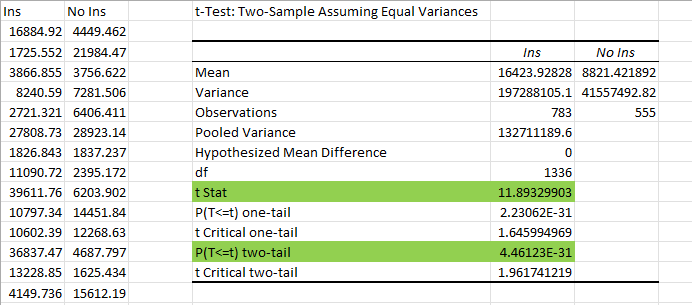

In [32]:
# Calculate the t-test on two independent samples
from scipy import stats
t_statistic, p_value = stats.ttest_ind(insured_charges, uninsured_charges)

print(f"t-Statistic using scipy.stats: {t_statistic}")
print(f"p-Value using scipy.stats: {p_value}")

t-Statistic using scipy.stats: 11.893299030876712
p-Value using scipy.stats: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

From the documentation it appears there is no direct function for performing a z-test using a sample but there is for a t-test. The reason being that z-tests are typically used when you know the population standard deviation and t-tests are used when you are estimating the standard deviation from a sample.

In [48]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, *, keepdims=False)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
  

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test